~~~~~~~
ENERGY EFFICIENCY - Inputs and Responses: Heating Loads(Y1) and Cooling Loads(Y2); 

Classification Problem using Deep Neural Networks with variable Hidden layers using KERAS API call

~~~~~~~

## Importing Packages

In [220]:
import numpy as np
import pandas as pd
import math
import random

import matplotlib.pyplot as plt
%matplotlib inline

# Keras --
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop

# Scikit Learn --
import sklearn
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split

## Loading Dataset

In [221]:
data = pd.read_excel('ENB2012_data.xlsx')

## Exploring Dataset

In [222]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [223]:
print("Observations =", data.shape[0])

Observations = 768


### Inputs Data Set

In [224]:
X = data.iloc[:,0:8]
X.head()

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0


### Response Data Set - Classifying Response Values as per Efficiency

#### Response 1: Heating Load(Y1)

In [225]:
Heating_Y = data.iloc[:,8:9]
Heating_Y['Efficiency_Y1'] = ""
Heating_Y.head()

,Y1,Efficiency_Y1
0,15.55,
1,15.55,
2,15.55,
3,15.55,
4,20.84,


In [226]:
print("Min =", Heating_Y.Y1.min(),"| Max =", Heating_Y.Y1.max(),"| MEAN =", Heating_Y.Y1.mean())

Min = 6.01 | Max = 43.1 | MEAN = 22.3071953125


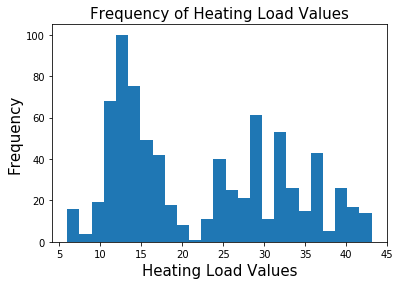

In [227]:
plt.title("Frequency of Heating Load Values", fontsize=15)
plt.xlabel("Heating Load Values", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.hist(Heating_Y.Y1, bins=25)
plt.show()

- (10,20)  has the most number of values in the data set which tends to be an efficient range. So classifying:

            Range     Efficiency
           (0,13)         0
           (13,18)        1
           (18,30)        2
           (30,40)        3

In [228]:
for i in range(len(Heating_Y)):

    if Heating_Y.Y1[i] <=13 :
        Heating_Y.Efficiency_Y1[i] = int(0)
    elif Heating_Y.Y1[i] <=18 :
        Heating_Y.Efficiency_Y1[i] = int(1)
    elif Heating_Y.Y1[i] <=30 :
        Heating_Y.Efficiency_Y1[i] = int(2)
    else:
        Heating_Y.Efficiency_Y1[i] = int(3)

/home/user/StackRoute/NeuralNetworks/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/user/StackRoute/NeuralNetworks/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/user/StackRoute/NeuralNetworks/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/user/StackRoute/NeuralNetworks/lib/p

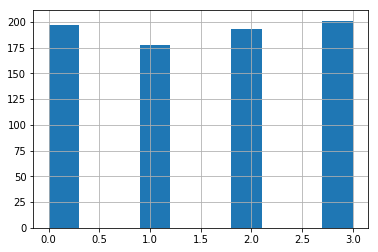

In [229]:
Heating_Y.Efficiency_Y1.hist()

#### Response 2: Cooling Load(Y2)

In [230]:
Cooling_Y = data.iloc[:,9:10]
Cooling_Y['Efficiency_Y2'] = ""
Cooling_Y.head()

,Y2,Efficiency_Y2
0,21.33,
1,21.33,
2,21.33,
3,21.33,
4,28.28,


In [231]:
print("Min =", Cooling_Y.Y2.min(),"| Max =", Cooling_Y.Y2.max(),"| MEAN =", Cooling_Y.Y2.mean())

Min = 10.9 | Max = 48.03 | MEAN = 24.5877604167


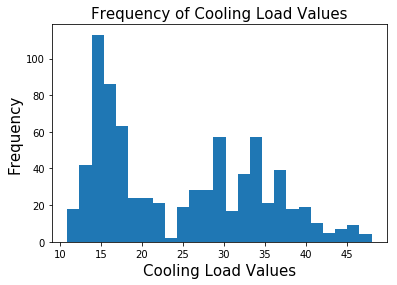

In [232]:
plt.title("Frequency of Cooling Load Values", fontsize=15)
plt.xlabel("Cooling Load Values", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.hist(Cooling_Y.Y2, bins=25)
plt.show()

- (10,20)  has the most number of values in the data set which tends to be an efficient range. So classifying:

            Range     Efficiency
           (0,17)         0
           (17,30)        1
           (30,49)        2

In [233]:
for i in range(len(Cooling_Y)):

    if Cooling_Y.Y2[i] <=17 :
        Cooling_Y.Efficiency_Y2[i] = int(0)
    elif Cooling_Y.Y2[i] <=30 :
        Cooling_Y.Efficiency_Y2[i] = int(1)
    else:
        Cooling_Y.Efficiency_Y2[i] = int(2)

/home/user/StackRoute/NeuralNetworks/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/user/StackRoute/NeuralNetworks/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/user/StackRoute/NeuralNetworks/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


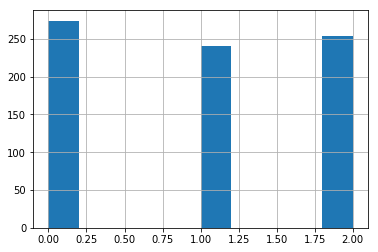

In [234]:
Cooling_Y.Efficiency_Y2.hist()

## Merged Data Set

In [235]:
temp = data.join(Heating_Y.Efficiency_Y1)
temp.join(Cooling_Y.Efficiency_Y2).head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,Efficiency_Y1,Efficiency_Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,1,1
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,1,1
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,1,1
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,1,1
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,2,1


In [322]:
# Normalizing Inputs
X = X - X.mean()

## Testing and Training units

In [323]:
# Training Heating Loads Y1
X_train,X_test, Y1_train,Y1_test = train_test_split(X, Heating_Y.Efficiency_Y1, random_state=4, train_size=.80, test_size=.20)

In [324]:
# Training Cooling Loads Y2
Y2_train, Y2_test = train_test_split(Cooling_Y.Efficiency_Y2, random_state=4, train_size=.80, test_size=.20)

In [325]:
# Converting into Array
x_train = np.array(X_train)
x_test = np.array(X_test)

.





.

## Heating Load Models

In [326]:
batch_size = 128
num_classes = 4  #(OUTPUTS = 0,1,2,3)
epochs = 10

In [327]:
# One-Hot-Key Encoding
y1_train = keras.utils.to_categorical(np.array(Y1_train), num_classes)
y1_test = keras.utils.to_categorical(np.array(Y1_test), num_classes)

In [328]:
Heating_train_accuracy = []
Heating_test_accuracy = []

#### MODEL 1.1 With 2 Hidden Layers

In [329]:
model1_1 = Sequential()

In [330]:
# Dense = No. of biases;  Param = No of connections + No. of bias

## Layer 0: Input Layer, which is X

## Layer 1: Hidden Layer;  No. of Bias = 512;
model1_1.add(Dense(512, activation='sigmoid', input_shape=(8,)))

## Layer 2: Hidden Layer;  No. of Bias = 128;
model1_1.add(Dense(128, activation='sigmoid'))

## Layer 3: Output Layer; No. of Bias = 4(0,1,2,3)
model1_1.add(Dense(num_classes, activation='softmax'))  

In [331]:
model1_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_113 (Dense)            (None, 512)               4608      
_________________________________________________________________
dense_114 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_115 (Dense)            (None, 4)                 516       
Total params: 70,788
Trainable params: 70,788
Non-trainable params: 0
_________________________________________________________________


In [332]:
model1_1.compile(optimizer = RMSprop(),
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

In [333]:
model_fit1_1 = model1_1.fit(x_train, 
                            y1_train, 
                            batch_size = batch_size, 
                            epochs = epochs,
                            validation_split = .2,
                            verbose=2)

Train on 491 samples, validate on 123 samples
Epoch 1/10
0s - loss: 1.1489 - acc: 0.5193 - val_loss: 0.8547 - val_acc: 0.7073
Epoch 2/10
0s - loss: 0.8670 - acc: 0.6802 - val_loss: 0.7785 - val_acc: 0.6992
Epoch 3/10
0s - loss: 0.8092 - acc: 0.6843 - val_loss: 0.7468 - val_acc: 0.6179
Epoch 4/10
0s - loss: 0.7861 - acc: 0.6782 - val_loss: 0.7146 - val_acc: 0.7154
Epoch 5/10
0s - loss: 0.7640 - acc: 0.7128 - val_loss: 0.7007 - val_acc: 0.6992
Epoch 6/10
0s - loss: 0.7510 - acc: 0.6864 - val_loss: 0.6886 - val_acc: 0.6829
Epoch 7/10
0s - loss: 0.7336 - acc: 0.6925 - val_loss: 0.6808 - val_acc: 0.7073
Epoch 8/10
0s - loss: 0.7470 - acc: 0.6701 - val_loss: 0.6626 - val_acc: 0.7154
Epoch 9/10
0s - loss: 0.7208 - acc: 0.7088 - val_loss: 0.6743 - val_acc: 0.7073
Epoch 10/10
0s - loss: 0.7139 - acc: 0.7026 - val_loss: 0.6652 - val_acc: 0.6829


In [334]:
y_hat1_1 = model1_1.predict_classes(x_test)

 32/154 [=====>........................] - ETA: 1s

In [335]:
y_hat1_1

array([3, 2, 1, 1, 1, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 0, 1, 1, 0, 0, 3, 3, 0,
       2, 1, 1, 3, 3, 3, 3, 0, 3, 3, 1, 2, 3, 0, 0, 3, 3, 3, 3, 2, 1, 0, 0,
       1, 1, 0, 3, 1, 3, 1, 0, 1, 3, 2, 2, 1, 3, 2, 1, 3, 3, 1, 1, 0, 2, 0,
       0, 1, 3, 0, 1, 0, 3, 1, 0, 3, 2, 3, 3, 3, 2, 0, 2, 0, 0, 2, 0, 2, 0,
       0, 2, 3, 1, 1, 3, 0, 1, 1, 1, 0, 2, 0, 3, 0, 0, 1, 0, 3, 3, 0, 0, 2,
       2, 0, 0, 1, 3, 0, 3, 3, 3, 3, 1, 3, 3, 2, 1, 3, 1, 3, 2, 1, 0, 1, 3,
       0, 1, 1, 3, 0, 0, 0, 1, 0, 3, 3, 1, 2, 1, 0, 0])

In [336]:
pd.crosstab(y_hat1_1,Y1_test)

Efficiency_Y1,0,1,2,3
row_0,,,,
0,29,16,0,0
1,11,23,4,0
2,0,0,14,6
3,0,0,18,33


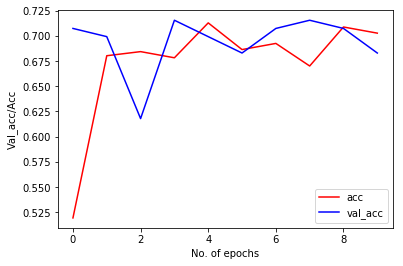

In [337]:
plt.plot(model_fit1_1.epoch,model_fit1_1.history['acc'],'r', label = 'acc')
plt.plot(model_fit1_1.epoch,model_fit1_1.history['val_acc'],'b', label = 'val_acc')
plt.xlabel('No. of epochs')
plt.ylabel('Val_acc/Acc')
plt.legend()

In [338]:
train_acc = model_fit1_1.history['acc'][epochs-1]
train_acc

0.70264765602022472

In [339]:
test_acc = model1_1.evaluate(x_test, y1_test)[1]
test_acc

 32/154 [=====>........................] - ETA: 0s

0.64285714672757432

In [340]:
Heating_train_accuracy.append(train_acc)
Heating_test_accuracy.append(test_acc)

#### MODEL 1.2 With 3 Hidden Layers

In [341]:
model1_2 = Sequential()

In [342]:
# Dense = No. of biases;  Param = No of connections + No. of bias

## Layer 0: Input Layer, which is X

## Layer 1: Hidden Layer;  No. of Bias = 512;
model1_2.add(Dense(512, activation='sigmoid', input_shape=(8,)))

## Layer 2: Hidden Layer;  No. of Bias = 256;
model1_2.add(Dense(256, activation='sigmoid'))

## Layer 3: Hidden Layer;  No. of Bias = 128;
model1_2.add(Dense(128, activation='sigmoid'))

## Layer 4: Output Layer; No. of Bias = 4(0,1,2,3)
model1_2.add(Dense(num_classes, activation='sigmoid'))  

In [343]:
model1_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_116 (Dense)            (None, 512)               4608      
_________________________________________________________________
dense_117 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_118 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_119 (Dense)            (None, 4)                 516       
Total params: 169,348
Trainable params: 169,348
Non-trainable params: 0
_________________________________________________________________


In [344]:
model1_2.compile(optimizer = RMSprop(),
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

In [345]:
model_fit1_2 = model1_2.fit(x_train, 
                            y1_train, 
                            batch_size = batch_size, 
                            epochs = epochs,
                            validation_split = .2,
                            verbose=2)

Train on 491 samples, validate on 123 samples
Epoch 1/10
0s - loss: 1.2390 - acc: 0.3360 - val_loss: 0.9251 - val_acc: 0.6098
Epoch 2/10
0s - loss: 0.9024 - acc: 0.5703 - val_loss: 0.8035 - val_acc: 0.6341
Epoch 3/10
0s - loss: 0.8382 - acc: 0.6151 - val_loss: 0.7771 - val_acc: 0.6829
Epoch 4/10
0s - loss: 0.8058 - acc: 0.6517 - val_loss: 0.7399 - val_acc: 0.7073
Epoch 5/10
0s - loss: 0.7885 - acc: 0.6558 - val_loss: 0.7179 - val_acc: 0.6911
Epoch 6/10
0s - loss: 0.7685 - acc: 0.6619 - val_loss: 0.7120 - val_acc: 0.6992
Epoch 7/10
0s - loss: 0.7515 - acc: 0.6680 - val_loss: 0.6857 - val_acc: 0.7073
Epoch 8/10
0s - loss: 0.7358 - acc: 0.6904 - val_loss: 0.6761 - val_acc: 0.6829
Epoch 9/10
0s - loss: 0.7286 - acc: 0.6843 - val_loss: 0.6633 - val_acc: 0.7073
Epoch 10/10
0s - loss: 0.7384 - acc: 0.7006 - val_loss: 0.6560 - val_acc: 0.7154


In [346]:
y_hat1_2 = model1_2.predict_classes(x_test)

 32/154 [=====>........................] - ETA: 0s

In [347]:
y_hat1_2

array([2, 2, 1, 0, 1, 0, 2, 2, 3, 0, 3, 3, 3, 0, 3, 0, 1, 0, 0, 0, 2, 2, 0,
       2, 0, 1, 3, 3, 3, 3, 0, 2, 2, 1, 2, 3, 0, 0, 2, 2, 3, 3, 2, 1, 0, 0,
       0, 0, 0, 2, 1, 2, 1, 0, 1, 2, 2, 2, 1, 3, 2, 1, 2, 2, 1, 0, 0, 2, 0,
       0, 1, 3, 0, 1, 0, 3, 1, 0, 3, 2, 2, 3, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0,
       0, 2, 3, 1, 1, 2, 0, 1, 1, 1, 0, 2, 0, 2, 0, 0, 1, 0, 3, 3, 0, 0, 2,
       2, 0, 0, 1, 3, 0, 3, 2, 2, 2, 1, 2, 3, 2, 1, 2, 1, 3, 2, 1, 0, 1, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 3, 0, 2, 1, 0, 0])

In [348]:
pd.crosstab(y_hat1_2, Y1_test)

Efficiency_Y1,0,1,2,3
row_0,,,,
0,35,20,0,0
1,5,19,4,0
2,0,0,31,15
3,0,0,1,24


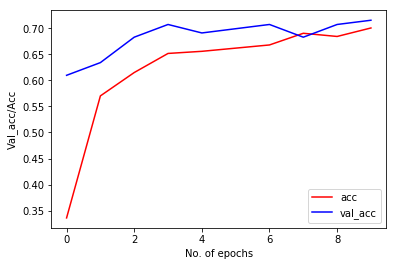

In [349]:
plt.plot(model_fit1_2.epoch, model_fit1_2.history['acc'],'r', label = 'acc')
plt.plot(model_fit1_2.epoch, model_fit1_2.history['val_acc'],'b', label = 'val_acc')
plt.xlabel('No. of epochs')
plt.ylabel('Val_acc/Acc')
plt.legend()

In [350]:
train_acc = model_fit1_2.history['acc'][epochs-1]
train_acc

0.70061099237919822

In [351]:
test_acc = model1_2.evaluate(x_test, y1_test)[1]
test_acc

 32/154 [=====>........................] - ETA: 0s

0.70779221166263928

In [352]:
Heating_train_accuracy.append(train_acc)
Heating_test_accuracy.append(test_acc)

In [353]:
Heating_train_accuracy

[0.70264765602022472, 0.70061099237919822]

#### MODEL 1.3 With 4 Hidden Layers

In [354]:
model1_3 = Sequential()

In [355]:
# Dense = No. of biases;  Param = No of connections + No. of bias

## Layer 0: Input Layer, which is X

## Layer 1: Hidden Layer;  No. of Bias = 512;
model1_3.add(Dense(512, activation='sigmoid', input_shape=(8,)))

## Layer 2: Hidden Layer;  No. of Bias = 400;
model1_3.add(Dense(400, activation='sigmoid'))

## Layer 3: Hidden Layer;  No. of Bias = 256;
model1_3.add(Dense(256, activation='sigmoid'))

## Layer 4: Hidden Layer;  No. of Bias = 128;
model1_3.add(Dense(128, activation='sigmoid'))

## Layer 5: Output Layer; No. of Bias = 4(0,1,2,3)
model1_3.add(Dense(num_classes, activation='sigmoid'))  

In [356]:
model1_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_120 (Dense)            (None, 512)               4608      
_________________________________________________________________
dense_121 (Dense)            (None, 400)               205200    
_________________________________________________________________
dense_122 (Dense)            (None, 256)               102656    
_________________________________________________________________
dense_123 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_124 (Dense)            (None, 4)                 516       
Total params: 345,876
Trainable params: 345,876
Non-trainable params: 0
_________________________________________________________________


In [357]:
model1_3.compile(optimizer = RMSprop(),
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

In [358]:
model_fit1_3 = model1_3.fit(x_train, 
                            y1_train, 
                            batch_size = batch_size, 
                            epochs = epochs,
                            validation_split = .2,
                            verbose=2)

Train on 491 samples, validate on 123 samples
Epoch 1/10
0s - loss: 1.3522 - acc: 0.3299 - val_loss: 1.1584 - val_acc: 0.5447
Epoch 2/10
0s - loss: 1.0528 - acc: 0.5458 - val_loss: 0.8783 - val_acc: 0.6341
Epoch 3/10
0s - loss: 0.8870 - acc: 0.5051 - val_loss: 0.8247 - val_acc: 0.6098
Epoch 4/10
0s - loss: 0.8580 - acc: 0.4745 - val_loss: 0.7966 - val_acc: 0.5447
Epoch 5/10
0s - loss: 0.8389 - acc: 0.5519 - val_loss: 0.7908 - val_acc: 0.5447
Epoch 6/10
0s - loss: 0.8107 - acc: 0.5927 - val_loss: 0.7610 - val_acc: 0.6423
Epoch 7/10
0s - loss: 0.7912 - acc: 0.5866 - val_loss: 0.7488 - val_acc: 0.6423
Epoch 8/10
0s - loss: 0.7803 - acc: 0.6029 - val_loss: 0.7539 - val_acc: 0.6423
Epoch 9/10
0s - loss: 0.7646 - acc: 0.6395 - val_loss: 0.7201 - val_acc: 0.7073
Epoch 10/10
0s - loss: 0.7624 - acc: 0.6477 - val_loss: 0.7137 - val_acc: 0.6829


In [359]:
y_hat1_3 = model1_3.predict_classes(x_test)

 32/154 [=====>........................] - ETA: 1s

In [360]:
y_hat1_3

array([2, 2, 0, 0, 0, 0, 2, 2, 3, 0, 3, 3, 3, 0, 3, 0, 1, 0, 0, 0, 2, 2, 0,
       2, 0, 1, 3, 3, 3, 3, 0, 2, 2, 1, 2, 3, 0, 0, 2, 2, 3, 3, 2, 0, 0, 0,
       0, 0, 0, 2, 1, 2, 1, 0, 0, 2, 2, 2, 0, 3, 2, 0, 2, 2, 0, 0, 0, 2, 0,
       0, 0, 3, 0, 1, 0, 3, 1, 0, 3, 2, 2, 3, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0,
       0, 2, 3, 0, 1, 2, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 1, 0, 3, 3, 0, 0, 2,
       2, 0, 0, 0, 3, 0, 3, 2, 2, 2, 1, 2, 3, 2, 0, 2, 1, 3, 2, 0, 0, 0, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 3, 0, 2, 0, 0, 0])

In [361]:
pd.crosstab(y_hat1_3, Y1_test)

Efficiency_Y1,0,1,2,3
row_0,,,,
0,36,31,4,0
1,4,8,0,0
2,0,0,31,15
3,0,0,1,24


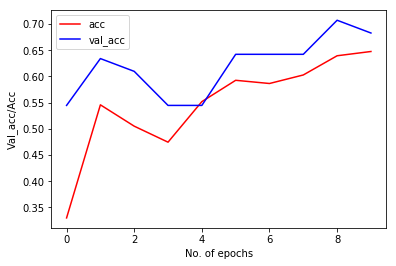

In [362]:
plt.plot(model_fit1_3.epoch, model_fit1_3.history['acc'],'r', label = 'acc')
plt.plot(model_fit1_3.epoch, model_fit1_3.history['val_acc'],'b', label = 'val_acc')
plt.xlabel('No. of epochs')
plt.ylabel('Val_acc/Acc')
plt.legend()

In [363]:
train_acc = model_fit1_3.history['acc'][epochs-1]
train_acc

0.64765784004797999

In [364]:
test_acc = model1_3.evaluate(x_test, y1_test)[1]
test_acc

 32/154 [=====>........................] - ETA: 0s

0.6428571428571429

In [365]:
Heating_train_accuracy.append(train_acc)
Heating_test_accuracy.append(test_acc)

In [366]:
Heating_train_accuracy

[0.70264765602022472, 0.70061099237919822, 0.64765784004797999]

#### MODEL 1.4 with 5 Hidden Layers

In [367]:
model1_4 = Sequential()

In [368]:
# Dense = No. of biases;  Param = No of connections + No. of bias

## Layer 0: Input Layer, which is X

## Layer 1: Hidden Layer;  No. of Bias = 600;
model1_4.add(Dense(600, activation='sigmoid', input_shape=(8,)))

## Layer 2: Hidden Layer;  No. of Bias = 500;
model1_4.add(Dense(500, activation='sigmoid'))

## Layer 3: Hidden Layer;  No. of Bias = 400;
model1_4.add(Dense(400, activation='sigmoid'))

## Layer 4: Hidden Layer;  No. of Bias = 300;
model1_4.add(Dense(300, activation='sigmoid'))

## Layer 5: Hidden Layer;  No. of Bias = 128;
model1_4.add(Dense(128, activation='sigmoid'))

## Layer 6: Output Layer; No. of Bias = 4(0,1,2,3)
model1_4.add(Dense(num_classes, activation='sigmoid'))  

In [369]:
model1_4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_125 (Dense)            (None, 600)               5400      
_________________________________________________________________
dense_126 (Dense)            (None, 500)               300500    
_________________________________________________________________
dense_127 (Dense)            (None, 400)               200400    
_________________________________________________________________
dense_128 (Dense)            (None, 300)               120300    
_________________________________________________________________
dense_129 (Dense)            (None, 128)               38528     
_________________________________________________________________
dense_130 (Dense)            (None, 4)                 516       
Total params: 665,644
Trainable params: 665,644
Non-trainable params: 0
_________________________________________________________________


In [370]:
model1_4.compile(optimizer = RMSprop(),
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

In [371]:
model_fit1_4 = model1_4.fit(x_train, 
                            y1_train, 
                            batch_size=batch_size, 
                            epochs=epochs,
                            validation_split = .2,
                            verbose=2)

Train on 491 samples, validate on 123 samples
Epoch 1/10
0s - loss: 1.4333 - acc: 0.3483 - val_loss: 1.2879 - val_acc: 0.4472
Epoch 2/10
0s - loss: 1.1554 - acc: 0.4847 - val_loss: 0.9285 - val_acc: 0.5854
Epoch 3/10
0s - loss: 0.9114 - acc: 0.5193 - val_loss: 0.8368 - val_acc: 0.5447
Epoch 4/10
0s - loss: 0.8582 - acc: 0.5051 - val_loss: 0.8116 - val_acc: 0.5447
Epoch 5/10
0s - loss: 0.8472 - acc: 0.5132 - val_loss: 0.8030 - val_acc: 0.5447
Epoch 6/10
0s - loss: 0.8388 - acc: 0.5132 - val_loss: 0.8062 - val_acc: 0.4472
Epoch 7/10
0s - loss: 0.8416 - acc: 0.4705 - val_loss: 0.7967 - val_acc: 0.5447
Epoch 8/10
0s - loss: 0.8354 - acc: 0.5132 - val_loss: 0.7948 - val_acc: 0.5447
Epoch 9/10
0s - loss: 0.8333 - acc: 0.5112 - val_loss: 0.7851 - val_acc: 0.6423
Epoch 10/10
0s - loss: 0.8241 - acc: 0.5682 - val_loss: 0.8571 - val_acc: 0.5447


In [372]:
y_hat1_4 = model1_4.predict_classes(x_test)

 32/154 [=====>........................] - ETA: 1s

In [373]:
y_hat1_4

array([2, 2, 1, 1, 1, 1, 2, 2, 3, 1, 3, 3, 3, 1, 3, 1, 1, 1, 1, 1, 2, 2, 1,
       2, 1, 1, 3, 3, 3, 3, 1, 2, 2, 1, 2, 3, 1, 1, 2, 2, 3, 3, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 3, 2, 1, 2, 2, 1, 1, 1, 2, 1,
       1, 1, 3, 1, 1, 1, 3, 1, 1, 3, 2, 2, 3, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 3, 3, 1, 1, 2,
       2, 1, 1, 1, 3, 1, 3, 2, 2, 2, 1, 2, 3, 2, 1, 2, 1, 3, 2, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3, 1, 2, 1, 1, 1])

In [374]:
pd.crosstab(y_hat1_4, Y1_test)

Efficiency_Y1,0,1,2,3
row_0,,,,
1,40,39,4,0
2,0,0,31,15
3,0,0,1,24


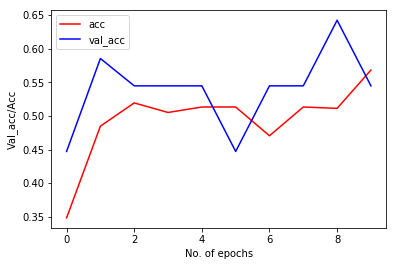

In [375]:
plt.plot(model_fit1_4.epoch,model_fit1_4.history['acc'],'r', label = 'acc')
plt.plot(model_fit1_4.epoch,model_fit1_4.history['val_acc'],'b', label = 'val_acc')
plt.xlabel('No. of epochs')
plt.ylabel('Val_acc/Acc')
plt.legend()

In [376]:
train_acc = model_fit1_4.history['acc'][epochs-1]
train_acc

0.56822810481376418

In [377]:
test_acc = model1_4.evaluate(x_test, y1_test)[1]
test_acc

 32/154 [=====>........................] - ETA: 0s

0.6103896142600419

In [378]:
Heating_train_accuracy.append(train_acc)
Heating_test_accuracy.append(test_acc)

#### MODEL 1.5 With 6 Hidden Layers Using RELU

In [417]:
model1_5 = Sequential()

In [418]:
# Dense = No. of biases;  Param = No of connections + No. of bias

## Layer 0: Input Layer, which is X

## Layer 1: Hidden Layer;  No. of Bias = 600;
model1_5.add(Dense(600, activation='relu', input_shape=(8,)))

## Layer 2: Hidden Layer;  No. of Bias = 500;
model1_5.add(Dense(500, activation='relu'))

## Layer 3: Hidden Layer;  No. of Bias = 400;
model1_5.add(Dense(400, activation='relu'))

## Layer 4: Hidden Layer;  No. of Bias = 300;
model1_5.add(Dense(300, activation='relu'))

## Layer 5: Hidden Layer;  No. of Bias = 200;
model1_5.add(Dense(200, activation='relu'))

## Layer 6: Hidden Layer;  No. of Bias = 128;
model1_5.add(Dense(128, activation='relu'))

## Layer 7: Output Layer; No. of Bias = 4(0,1,2,3)
model1_5.add(Dense(num_classes, activation='relu'))  

In [419]:
model1_5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_159 (Dense)            (None, 600)               5400      
_________________________________________________________________
dense_160 (Dense)            (None, 500)               300500    
_________________________________________________________________
dense_161 (Dense)            (None, 400)               200400    
_________________________________________________________________
dense_162 (Dense)            (None, 300)               120300    
_________________________________________________________________
dense_163 (Dense)            (None, 200)               60200     
_________________________________________________________________
dense_164 (Dense)            (None, 128)               25728     
_________________________________________________________________
dense_165 (Dense)            (None, 4)                 516       
Total para

In [420]:
model1_5.compile(optimizer = RMSprop(),
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

In [421]:
model_fit1_5 = model1_5.fit(x_train, 
                            y1_train, 
                            batch_size=batch_size, 
                            epochs=epochs,
                            validation_split = .2,
                            verbose=2)

Train on 491 samples, validate on 123 samples
Epoch 1/10
0s - loss: 4.7374 - acc: 0.4358 - val_loss: 4.5120 - val_acc: 0.6098
Epoch 2/10
0s - loss: 4.6698 - acc: 0.5886 - val_loss: 4.4769 - val_acc: 0.6098
Epoch 3/10
0s - loss: 4.6667 - acc: 0.5560 - val_loss: 4.4824 - val_acc: 0.6179
Epoch 4/10
0s - loss: 4.6641 - acc: 0.5947 - val_loss: 4.4908 - val_acc: 0.5854
Epoch 5/10
0s - loss: 4.6655 - acc: 0.5642 - val_loss: 4.4870 - val_acc: 0.6098
Epoch 6/10
0s - loss: 4.6614 - acc: 0.5743 - val_loss: 4.4883 - val_acc: 0.5854
Epoch 7/10
0s - loss: 4.6544 - acc: 0.5723 - val_loss: 4.4969 - val_acc: 0.5854
Epoch 8/10
0s - loss: 4.6585 - acc: 0.5723 - val_loss: 4.4614 - val_acc: 0.6179
Epoch 9/10
0s - loss: 4.6608 - acc: 0.5845 - val_loss: 4.4859 - val_acc: 0.6098
Epoch 10/10
0s - loss: 4.6617 - acc: 0.5723 - val_loss: 4.4640 - val_acc: 0.6098


In [422]:
y_hat1_5 = model1_5.predict_classes(x_test)

 32/154 [=====>........................] - ETA: 1s

In [423]:
y_hat1_5

array([3, 3, 1, 1, 1, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 0, 1, 1, 0, 0, 3, 3, 0,
       3, 1, 1, 3, 3, 3, 3, 0, 3, 3, 1, 3, 3, 0, 0, 3, 3, 3, 3, 3, 1, 0, 0,
       1, 1, 0, 3, 1, 3, 1, 0, 1, 3, 3, 3, 1, 3, 3, 1, 3, 3, 1, 1, 0, 3, 0,
       0, 1, 3, 0, 1, 0, 3, 1, 0, 3, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 0, 3, 0,
       0, 3, 3, 1, 1, 3, 0, 1, 1, 1, 0, 3, 0, 3, 0, 0, 1, 0, 3, 3, 0, 0, 3,
       3, 0, 0, 1, 3, 0, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 1, 0, 1, 3,
       0, 1, 1, 3, 0, 0, 0, 1, 0, 3, 3, 1, 3, 1, 0, 0])

In [424]:
pd.crosstab(y_hat1_5, Y1_test)

Efficiency_Y1,0,1,2,3
row_0,,,,
0,29,16,0,0
1,11,23,4,0
3,0,0,32,39


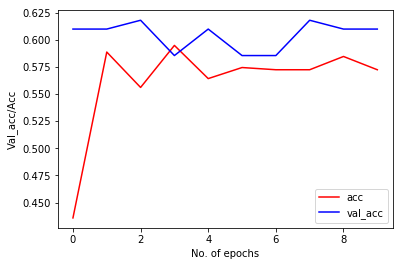

In [425]:
plt.plot(model_fit1_5.epoch, model_fit1_5.history['acc'],'r', label = 'acc')
plt.plot(model_fit1_5.epoch, model_fit1_5.history['val_acc'],'b', label = 'val_acc')
plt.xlabel('No. of epochs')
plt.ylabel('Val_acc/Acc')
plt.legend()

In [426]:
train_acc = model_fit1_5.history['acc'][epochs-1]
train_acc

0.57230143148884516

In [427]:
test_acc = model1_5.evaluate(x_test, y1_test)[1]
test_acc

 32/154 [=====>........................] - ETA: 0s

0.59090909013500459

In [459]:
Heating_train_accuracy.append(train_acc)
Heating_test_accuracy.append(test_acc)

.


.


.


.

## Cooling Load Models

In [496]:
batch_size = 128
num_classes = 3 #(OUTPUTS = 0,1,2)
epochs = 10

In [497]:
# One-Hot-Key Encoding
y2_train = keras.utils.to_categorical(np.array(Y2_train), num_classes)
y2_test = keras.utils.to_categorical(np.array(Y2_test), num_classes)

In [498]:
Cooling_train_accuracy = []
Cooling_test_accuracy = []

#### MODEL 2.1 With 2 Hidden Layers

In [501]:
model2_1 = Sequential()

In [502]:
# Dense = No. of biases;  Param = No of connections + No. of bias

## Layer 0: Input Layer, which is X

## Layer 1: Hidden Layer;  No. of Bias = 512;
model2_1.add(Dense(512, activation='sigmoid', input_shape=(8,)))

## Layer 2: Hidden Layer;  No. of Bias = 128;
model2_1.add(Dense(128, activation='sigmoid'))

## Layer 3: Output Layer; No. of Bias = 4(0,1,2,3)
model2_1.add(Dense(num_classes, activation='sigmoid'))  

In [503]:
model2_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_172 (Dense)            (None, 512)               4608      
_________________________________________________________________
dense_173 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_174 (Dense)            (None, 3)                 387       
Total params: 70,659
Trainable params: 70,659
Non-trainable params: 0
_________________________________________________________________


In [504]:
model2_1.compile(optimizer = RMSprop(),
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

In [505]:
model_fit2_1 = model2_1.fit(x_train, 
                            y2_train, 
                            batch_size = batch_size, 
                            epochs = epochs,
                            validation_split = .2,
                            verbose=2)

Train on 491 samples, validate on 123 samples
Epoch 1/10
0s - loss: 0.8707 - acc: 0.5560 - val_loss: 0.6233 - val_acc: 0.7398
Epoch 2/10
0s - loss: 0.6525 - acc: 0.6782 - val_loss: 0.5973 - val_acc: 0.7398
Epoch 3/10
0s - loss: 0.6216 - acc: 0.6721 - val_loss: 0.5581 - val_acc: 0.7398
Epoch 4/10
0s - loss: 0.6024 - acc: 0.6558 - val_loss: 0.5681 - val_acc: 0.7236
Epoch 5/10
0s - loss: 0.5808 - acc: 0.6701 - val_loss: 0.5321 - val_acc: 0.7398
Epoch 6/10
0s - loss: 0.5905 - acc: 0.6721 - val_loss: 0.5316 - val_acc: 0.7317
Epoch 7/10
0s - loss: 0.5803 - acc: 0.6741 - val_loss: 0.5685 - val_acc: 0.6423
Epoch 8/10
0s - loss: 0.5612 - acc: 0.6640 - val_loss: 0.5160 - val_acc: 0.7236
Epoch 9/10
0s - loss: 0.5459 - acc: 0.7047 - val_loss: 0.5199 - val_acc: 0.7154
Epoch 10/10
0s - loss: 0.5525 - acc: 0.6497 - val_loss: 0.5311 - val_acc: 0.6423


In [506]:
y_hat2_1 = model2_1.predict_classes(x_test)

 32/154 [=====>........................] - ETA: 1s

In [507]:
y_hat2_1

array([1, 1, 1, 0, 1, 0, 1, 1, 2, 0, 2, 2, 2, 0, 2, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 2, 2, 2, 2, 0, 1, 1, 1, 1, 2, 0, 0, 1, 1, 2, 2, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 2, 0, 1, 0, 2, 1, 0, 2, 1, 1, 2, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 2, 2, 0, 0, 1,
       1, 0, 0, 1, 2, 0, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 1, 1, 0, 0])

In [510]:
pd.crosstab(y_hat2_1, Y2_test)

Efficiency_Y2,0,1,2
row_0,,,
0,46,10,0
1,11,40,22
2,0,0,25


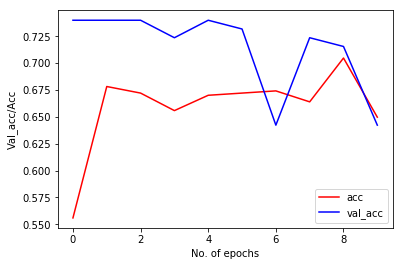

In [511]:
plt.plot(model_fit2_1.epoch, model_fit2_1.history['acc'],'r', label = 'acc')
plt.plot(model_fit2_1.epoch, model_fit2_1.history['val_acc'],'b', label = 'val_acc')
plt.xlabel('No. of epochs')
plt.ylabel('Val_acc/Acc')
plt.legend()

In [512]:
train_acc = model_fit2_1.history['acc'][epochs-1]
train_acc

0.64969449919741407

In [514]:
test_acc = model2_1.evaluate(x_test, y2_test)[1]
test_acc

 32/154 [=====>........................] - ETA: 0s

0.72077921845696191

In [515]:
Cooling_train_accuracy.append(train_acc)
Cooling_test_accuracy.append(test_acc)

#### MODEL 2.2 With 3 Hidden Layers

In [517]:
model2_2 = Sequential()

In [518]:
# Dense = No. of biases;  Param = No of connections + No. of bias

## Layer 0: Input Layer, which is X

## Layer 1: Hidden Layer;  No. of Bias = 512;
model2_2.add(Dense(512, activation='sigmoid', input_shape=(8,)))

## Layer 2: Hidden Layer;  No. of Bias = 256;
model2_2.add(Dense(256, activation='sigmoid'))

## Layer 3: Hidden Layer;  No. of Bias = 128;
model2_2.add(Dense(128, activation='sigmoid'))

## Layer 4: Output Layer; No. of Bias = 4(0,1,2,3)
model2_2.add(Dense(num_classes, activation='sigmoid'))  

In [519]:
model2_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_175 (Dense)            (None, 512)               4608      
_________________________________________________________________
dense_176 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_177 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_178 (Dense)            (None, 3)                 387       
Total params: 169,219
Trainable params: 169,219
Non-trainable params: 0
_________________________________________________________________


In [520]:
model2_2.compile(optimizer = RMSprop(),
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

In [521]:
model_fit2_2 = model2_2.fit(x_train, 
                            y2_train, 
                            batch_size = batch_size, 
                            epochs = epochs,
                            validation_split = .2,
                            verbose=2)

Train on 491 samples, validate on 123 samples
Epoch 1/10
0s - loss: 0.9620 - acc: 0.5397 - val_loss: 0.7058 - val_acc: 0.7398
Epoch 2/10
0s - loss: 0.7106 - acc: 0.6741 - val_loss: 0.6343 - val_acc: 0.7398
Epoch 3/10
0s - loss: 0.6534 - acc: 0.6782 - val_loss: 0.5979 - val_acc: 0.7398
Epoch 4/10
0s - loss: 0.6373 - acc: 0.6741 - val_loss: 0.5643 - val_acc: 0.7398
Epoch 5/10
0s - loss: 0.6113 - acc: 0.6701 - val_loss: 0.5669 - val_acc: 0.7398
Epoch 6/10
0s - loss: 0.6027 - acc: 0.6864 - val_loss: 0.5479 - val_acc: 0.6911
Epoch 7/10
0s - loss: 0.5952 - acc: 0.6436 - val_loss: 0.5372 - val_acc: 0.7073
Epoch 8/10
0s - loss: 0.5744 - acc: 0.6436 - val_loss: 0.5698 - val_acc: 0.6423
Epoch 9/10
0s - loss: 0.5723 - acc: 0.6782 - val_loss: 0.5410 - val_acc: 0.7154
Epoch 10/10
0s - loss: 0.5622 - acc: 0.6640 - val_loss: 0.5318 - val_acc: 0.5610


In [522]:
y_hat2_2 = model2_2.predict_classes(x_test)

 32/154 [=====>........................] - ETA: 1s

In [523]:
y_hat2_2

array([1, 1, 0, 0, 0, 0, 1, 2, 2, 0, 2, 2, 2, 0, 2, 0, 1, 0, 0, 0, 2, 1, 0,
       1, 0, 1, 2, 2, 2, 2, 0, 1, 1, 1, 1, 2, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 2, 1, 0, 0, 1, 1, 1, 0, 2, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 2, 0, 1, 0, 2, 1, 0, 2, 1, 1, 2, 2, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 2, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 2, 2, 0, 0, 1,
       1, 0, 0, 0, 2, 0, 2, 1, 1, 1, 1, 1, 2, 1, 0, 2, 1, 2, 1, 0, 0, 0, 2,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0])

In [524]:
pd.crosstab(y_hat2_2, Y2_test)

Efficiency_Y2,0,1,2
row_0,,,
0,47,24,0
1,10,21,20
2,0,5,27


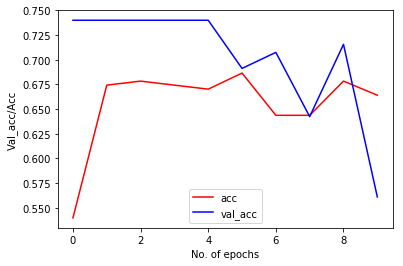

In [525]:
plt.plot(model_fit2_2.epoch, model_fit2_2.history['acc'],'r', label = 'acc')
plt.plot(model_fit2_2.epoch, model_fit2_2.history['val_acc'],'b', label = 'val_acc')
plt.xlabel('No. of epochs')
plt.ylabel('Val_acc/Acc')
plt.legend()

In [526]:
train_acc = model_fit2_2.history['acc'][epochs-1]
train_acc

0.66395111603552359

In [528]:
test_acc = model2_2.evaluate(x_test, y2_test)[1]
test_acc

 32/154 [=====>........................] - ETA: 0s

0.61688311688311692

In [529]:
Cooling_train_accuracy.append(train_acc)
Cooling_test_accuracy.append(test_acc)

#### MODEL 2.3 With 4 Hidden Layers

In [531]:
model2_3 = Sequential()

In [532]:
# Dense = No. of biases;  Param = No of connections + No. of bias

## Layer 0: Input Layer, which is X

## Layer 1: Hidden Layer;  No. of Bias = 512;
model2_3.add(Dense(512, activation='sigmoid', input_shape=(8,)))

## Layer 2: Hidden Layer;  No. of Bias = 400;
model2_3.add(Dense(400, activation='sigmoid'))

## Layer 3: Hidden Layer;  No. of Bias = 256;
model2_3.add(Dense(256, activation='sigmoid'))

## Layer 4: Hidden Layer;  No. of Bias = 128;
model2_3.add(Dense(128, activation='sigmoid'))

## Layer 5: Output Layer; No. of Bias = 4(0,1,2,3)
model2_3.add(Dense(num_classes, activation='sigmoid'))  

In [533]:
model2_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_179 (Dense)            (None, 512)               4608      
_________________________________________________________________
dense_180 (Dense)            (None, 400)               205200    
_________________________________________________________________
dense_181 (Dense)            (None, 256)               102656    
_________________________________________________________________
dense_182 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_183 (Dense)            (None, 3)                 387       
Total params: 345,747
Trainable params: 345,747
Non-trainable params: 0
_________________________________________________________________


In [534]:
model2_3.compile(optimizer = RMSprop(),
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

In [535]:
model_fit2_3 = model2_3.fit(x_train, 
                            y2_train, 
                            batch_size = batch_size, 
                            epochs = epochs,
                            validation_split = .2,
                            verbose=2)

Train on 491 samples, validate on 123 samples
Epoch 1/10
0s - loss: 1.1018 - acc: 0.5642 - val_loss: 0.9959 - val_acc: 0.5366
Epoch 2/10
0s - loss: 0.8787 - acc: 0.6212 - val_loss: 0.6729 - val_acc: 0.7398
Epoch 3/10
0s - loss: 0.6894 - acc: 0.6782 - val_loss: 0.6253 - val_acc: 0.7398
Epoch 4/10
0s - loss: 0.6595 - acc: 0.6782 - val_loss: 0.6206 - val_acc: 0.7398
Epoch 5/10
0s - loss: 0.6557 - acc: 0.6782 - val_loss: 0.5899 - val_acc: 0.7398
Epoch 6/10
0s - loss: 0.6410 - acc: 0.6782 - val_loss: 0.5883 - val_acc: 0.7398
Epoch 7/10
0s - loss: 0.6285 - acc: 0.6741 - val_loss: 0.5813 - val_acc: 0.7398
Epoch 8/10
0s - loss: 0.6296 - acc: 0.6721 - val_loss: 0.5724 - val_acc: 0.7398
Epoch 9/10
0s - loss: 0.6217 - acc: 0.6782 - val_loss: 0.5857 - val_acc: 0.6504
Epoch 10/10
0s - loss: 0.5912 - acc: 0.6904 - val_loss: 0.5319 - val_acc: 0.7398


In [536]:
y_hat2_3 = model2_3.predict_classes(x_test)

 32/154 [=====>........................] - ETA: 1s

In [537]:
y_hat2_3

array([2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0,
       2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0,
       0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0])

In [538]:
pd.crosstab(y_hat2_3, Y2_test)

Efficiency_Y2,0,1,2
row_0,,,
0,57,26,0
2,0,24,47


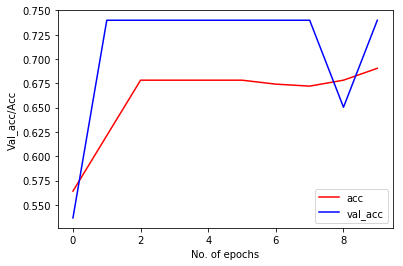

In [539]:
plt.plot(model_fit2_3.epoch, model_fit2_3.history['acc'],'r', label = 'acc')
plt.plot(model_fit2_3.epoch, model_fit2_3.history['val_acc'],'b', label = 'val_acc')
plt.xlabel('No. of epochs')
plt.ylabel('Val_acc/Acc')
plt.legend()

In [540]:
train_acc = model_fit2_3.history['acc'][epochs-1]
train_acc

0.6904277036729024

In [541]:
test_acc = model2_3.evaluate(x_test, y2_test)[1]
test_acc

 32/154 [=====>........................] - ETA: 0s

0.67532467455058898

In [542]:
Cooling_train_accuracy.append(train_acc)
Cooling_test_accuracy.append(test_acc)

#### MODEL 2.4 with 5 Hidden Layers

In [584]:
model2_4 = Sequential()

In [585]:
# Dense = No. of biases;  Param = No of connections + No. of bias

## Layer 0: Input Layer, which is X

## Layer 1: Hidden Layer;  No. of Bias = 600;
model2_4.add(Dense(600, activation='sigmoid', input_shape=(8,)))

## Layer 2: Hidden Layer;  No. of Bias = 500;
model2_4.add(Dense(500, activation='sigmoid'))

## Layer 3: Hidden Layer;  No. of Bias = 400;
model2_4.add(Dense(400, activation='sigmoid'))

## Layer 4: Hidden Layer;  No. of Bias = 300;
model2_4.add(Dense(300, activation='sigmoid'))

## Layer 5: Hidden Layer;  No. of Bias = 128;
model2_4.add(Dense(128, activation='sigmoid'))

## Layer 6: Output Layer; No. of Bias = 4(0,1,2,3)
model2_4.add(Dense(num_classes, activation='sigmoid'))  

In [586]:
model2_4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_214 (Dense)            (None, 600)               5400      
_________________________________________________________________
dense_215 (Dense)            (None, 500)               300500    
_________________________________________________________________
dense_216 (Dense)            (None, 400)               200400    
_________________________________________________________________
dense_217 (Dense)            (None, 300)               120300    
_________________________________________________________________
dense_218 (Dense)            (None, 128)               38528     
_________________________________________________________________
dense_219 (Dense)            (None, 3)                 387       
Total params: 665,515
Trainable params: 665,515
Non-trainable params: 0
_________________________________________________________________


In [587]:
model2_4.compile(optimizer = RMSprop(),
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

In [588]:
model_fit2_4 = model2_4.fit(x_train, 
                            y2_train, 
                            batch_size=batch_size, 
                            epochs=epochs,
                            validation_split = .2,
                            verbose=2)

Train on 491 samples, validate on 123 samples
Epoch 1/10
0s - loss: 1.1395 - acc: 0.3299 - val_loss: 1.0184 - val_acc: 0.6748
Epoch 2/10
0s - loss: 0.9199 - acc: 0.5560 - val_loss: 0.6840 - val_acc: 0.7398
Epoch 3/10
0s - loss: 0.6998 - acc: 0.6782 - val_loss: 0.6410 - val_acc: 0.7398
Epoch 4/10
0s - loss: 0.6569 - acc: 0.6782 - val_loss: 0.5947 - val_acc: 0.7398
Epoch 5/10
0s - loss: 0.6467 - acc: 0.6782 - val_loss: 0.6305 - val_acc: 0.7398
Epoch 6/10
0s - loss: 0.6519 - acc: 0.6782 - val_loss: 0.5898 - val_acc: 0.7398
Epoch 7/10
0s - loss: 0.6416 - acc: 0.6782 - val_loss: 0.5812 - val_acc: 0.7398
Epoch 8/10
0s - loss: 0.6363 - acc: 0.6782 - val_loss: 0.5877 - val_acc: 0.7398
Epoch 9/10
0s - loss: 0.6395 - acc: 0.6802 - val_loss: 0.5771 - val_acc: 0.7398
Epoch 10/10
0s - loss: 0.6394 - acc: 0.6782 - val_loss: 0.5723 - val_acc: 0.7398


In [589]:
y_hat2_4 = model2_4.predict_classes(x_test)

 32/154 [=====>........................] - ETA: 1s

In [590]:
y_hat2_4

array([2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0,
       2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0,
       0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0])

In [591]:
pd.crosstab(y_hat2_4, Y2_test)

Efficiency_Y2,0,1,2
row_0,,,
0,57,26,0
2,0,24,47


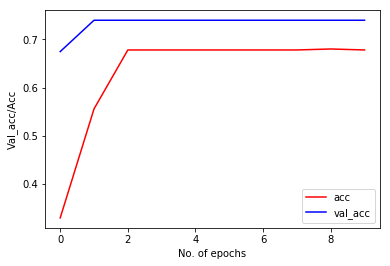

In [592]:
plt.plot(model_fit2_4.epoch,model_fit2_4.history['acc'],'r', label = 'acc')
plt.plot(model_fit2_4.epoch,model_fit2_4.history['val_acc'],'b', label = 'val_acc')
plt.xlabel('No. of epochs')
plt.ylabel('Val_acc/Acc')
plt.legend()

In [593]:
train_acc = model_fit2_4.history['acc'][epochs-1]
train_acc

0.67820774367773362

In [594]:
test_acc = model2_4.evaluate(x_test, y2_test)[1]
test_acc

 32/154 [=====>........................] - ETA: 0s

0.67532467455058898

In [595]:
Cooling_train_accuracy.append(train_acc)
Cooling_test_accuracy.append(test_acc)

#### MODEL 2.5 With 6 Hidden Layers Using RELU

In [618]:
model2_5 = Sequential()

In [619]:
# Dense = No. of biases;  Param = No of connections + No. of bias

## Layer 0: Input Layer, which is X

## Layer 1: Hidden Layer;  No. of Bias = 600;
model2_5.add(Dense(600, activation='relu', input_shape=(8,)))

## Layer 2: Hidden Layer;  No. of Bias = 500;
model2_5.add(Dense(500, activation='relu'))

## Layer 3: Hidden Layer;  No. of Bias = 400;
model2_5.add(Dense(400, activation='relu'))

## Layer 4: Hidden Layer;  No. of Bias = 300;
model2_5.add(Dense(300, activation='relu'))

## Layer 5: Hidden Layer;  No. of Bias = 200;
model2_5.add(Dense(200, activation='relu'))

## Layer 6: Hidden Layer;  No. of Bias = 128;
model2_5.add(Dense(128, activation='relu'))

## Layer 7: Output Layer; No. of Bias = 4(0,1,2,3)
model2_5.add(Dense(num_classes, activation='relu'))  

In [620]:
model2_5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_248 (Dense)            (None, 600)               5400      
_________________________________________________________________
dense_249 (Dense)            (None, 500)               300500    
_________________________________________________________________
dense_250 (Dense)            (None, 400)               200400    
_________________________________________________________________
dense_251 (Dense)            (None, 300)               120300    
_________________________________________________________________
dense_252 (Dense)            (None, 200)               60200     
_________________________________________________________________
dense_253 (Dense)            (None, 128)               25728     
_________________________________________________________________
dense_254 (Dense)            (None, 3)                 387       
Total para

In [621]:
model2_5.compile(optimizer = RMSprop(),
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

In [622]:
model_fit2_5 = model2_5.fit(x_train, 
                            y2_train, 
                            batch_size=batch_size, 
                            epochs=epochs,
                            validation_split = .2,
                            verbose=2)

Train on 491 samples, validate on 123 samples
Epoch 1/10
0s - loss: 5.4884 - acc: 0.3849 - val_loss: 0.6003 - val_acc: 0.7398
Epoch 2/10
0s - loss: 0.6301 - acc: 0.6741 - val_loss: 0.5577 - val_acc: 0.7398
Epoch 3/10
0s - loss: 0.5731 - acc: 0.6782 - val_loss: 0.6119 - val_acc: 0.7073
Epoch 4/10
0s - loss: 0.6791 - acc: 0.6497 - val_loss: 0.5212 - val_acc: 0.7398
Epoch 5/10
0s - loss: 0.5748 - acc: 0.6823 - val_loss: 0.4806 - val_acc: 0.7398
Epoch 6/10
0s - loss: 0.6413 - acc: 0.6640 - val_loss: 0.5807 - val_acc: 0.6341
Epoch 7/10
0s - loss: 0.5654 - acc: 0.6701 - val_loss: 0.4872 - val_acc: 0.7398
Epoch 8/10
0s - loss: 0.6470 - acc: 0.5642 - val_loss: 0.5651 - val_acc: 0.7398
Epoch 9/10
0s - loss: 0.5980 - acc: 0.6721 - val_loss: 0.5707 - val_acc: 0.6829
Epoch 10/10
0s - loss: 0.5743 - acc: 0.6599 - val_loss: 0.4873 - val_acc: 0.7317


In [623]:
y_hat2_5 = model2_5.predict_classes(x_test)

 32/154 [=====>........................] - ETA: 2s

In [624]:
y_hat2_5

array([2, 2, 1, 0, 1, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 1, 0, 0, 0, 2, 2, 0,
       2, 0, 1, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 2, 2, 1, 0, 0,
       0, 0, 0, 2, 1, 2, 1, 0, 0, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 0, 0, 2, 0,
       0, 1, 2, 0, 1, 0, 2, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0,
       0, 2, 2, 1, 1, 2, 0, 1, 1, 1, 0, 2, 0, 2, 0, 0, 1, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 1, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 0, 1, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0])

In [625]:
pd.crosstab(y_hat2_5, Y2_test)

Efficiency_Y2,0,1,2
row_0,,,
0,46,10,0
1,11,16,0
2,0,24,47


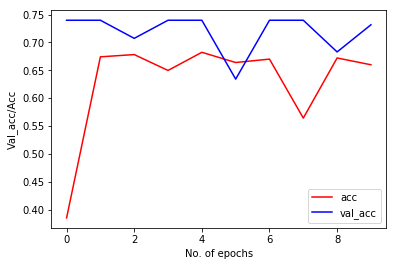

In [626]:
plt.plot(model_fit2_5.epoch, model_fit2_5.history['acc'],'r', label = 'acc')
plt.plot(model_fit2_5.epoch, model_fit2_5.history['val_acc'],'b', label = 'val_acc')
plt.xlabel('No. of epochs')
plt.ylabel('Val_acc/Acc')
plt.legend()

In [627]:
train_acc = model_fit2_5.history['acc'][epochs-1]
train_acc

0.65987780016454323

In [628]:
test_acc = model2_5.evaluate(x_test, y2_test)[1]
test_acc

 32/154 [=====>........................] - ETA: 0s

0.70779221088855293

In [629]:
Cooling_train_accuracy.append(train_acc)
Cooling_test_accuracy.append(test_acc)

-----

## Accuracy

##### Heating Load Accuracy

In [657]:
print('Heating_train_accuracy =', Heating_train_accuracy, '\n\nHeating Test Accuracy =', Heating_test_accuracy) 

Heating_train_accuracy = [0.70264765602022472, 0.70061099237919822, 0.64765784004797999, 0.56822810481376418, 0.57230143148884516] 

Heating Test Accuracy = [0.64285714672757432, 0.70779221166263928, 0.6428571428571429, 0.6103896142600419, 0.59090909013500459]


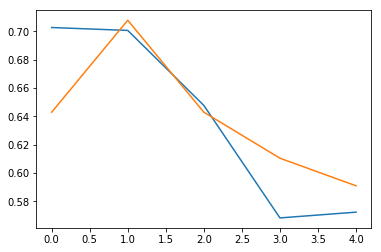

In [658]:
plt.plot([0,1,2,3,4],Heating_train_accuracy)
plt.plot([0,1,2,3,4], Heating_test_accuracy)

##### Cooling Load Accuracy

In [656]:
print('Cooling Train Accuracy =', Cooling_train_accuracy, '\n\nCooling Test Accuracy =', Cooling_test_accuracy) 

Cooling Train Accuracy = [0.64969449919741407, 0.66395111603552359, 0.6904277036729024, 0.67820774367773362, 0.65987780016454323] 

Cooling Test Accuracy = [0.72077921845696191, 0.61688311688311692, 0.67532467455058898, 0.67532467455058898, 0.70779221088855293]


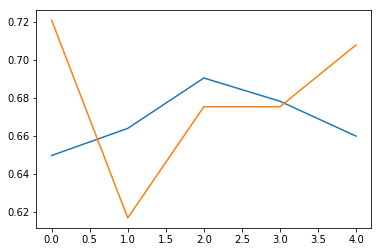

In [651]:
plt.plot([0,1,2,3,4], Cooling_train_accuracy)
plt.plot([0,1,2,3,4], Cooling_test_accuracy)

-----

## EARLY STOPPING

In [659]:
z = [keras.callbacks.EarlyStopping(monitor="val_acc", min_delta=0.01, patience=3, verbose=1, mode='max')]

model5_fit = model1_1.fit(x_train, 
                          y1_train, 
                          batch_size = batch_size, 
                          epochs = epochs, 
                          validation_split = .2,
                          verbose = 2,
                          callbacks = z
)

Train on 491 samples, validate on 123 samples
Epoch 1/10
0s - loss: 0.7088 - acc: 0.6925 - val_loss: 0.6626 - val_acc: 0.7154
Epoch 2/10
0s - loss: 0.7020 - acc: 0.7047 - val_loss: 0.6406 - val_acc: 0.7154
Epoch 3/10
0s - loss: 0.6974 - acc: 0.7047 - val_loss: 0.6468 - val_acc: 0.7073
Epoch 4/10
0s - loss: 0.7024 - acc: 0.6986 - val_loss: 0.6363 - val_acc: 0.7154
Epoch 5/10
0s - loss: 0.6927 - acc: 0.7108 - val_loss: 0.6398 - val_acc: 0.7073
Epoch 00004: early stopping
